## Data Exploration Report

#### Salmon, Simkins, Stephan, Rounds
#### 10/18/24


#### Introduction

Buildings are one of the largest emitters of carbon dioxide, especially in a metropolitan city, like Seattle. In order to minimize the emissions of these buildings, it is important to first understand what factors are most impactful in generating large amounts of emissions. If we can get a strong understanding of this, then we can design buildings with the minimization of emissions in mind, and make a significant, positive impact on the environment. Furthermore, we should be able to predict if buildings will be efficient in their use of energy, and estimate how much co2 emission they will contribute to the environment. In order to do this we performed the following analysis, with our main focus being identifying the key variables, and determining how to best create a model to predict energy performance and emissions. Our end goal is to develop a model that can classify a building as a low, medium, or high level emitter, purely from its attributes. A model of this nature would enable a path to a cleaner future, where limiting ecological harm is at the ground floor of the design process.


#### Data Sources:

https://data.seattle.gov/Permitting/2022-Building-Energy-Benchmarking/5sxi-iyiy/about_data

Cleaned Data:
https://www.mediafire.com/file/pvdf7nokqghbxvt/Seattle_Building_Data_Cleaned.csv/file

#### Overview of Data Engineering Efforts

We used three different advanced data exploration methods in order to further understand the relationships between our variables and the co2 emissions of buildings. First, we created a heatmap of emissions across all of Seattle, looking to identify any patterns or anomalies in the data. To do this, we implemented several JavaScript libraries, like Leaflet, allowing us to create an interactive map. We created a heat map layer using the precise latitude and longitude values from the dataset, coloring by intensity, and applied it to a map, zoomed in on Seattle. We gained a lot of valuable information from this analysis, as we were able to notice some trends and groupings in the data, like there being a group of buildings near the port with considerably high energy usage. Additionally, we found the map to be useful for outlier detection, like a University of Washington medical research building that had one of the highest greenhouse gas intensity scores of the whole dataset. With this, we were able to gauge if the outliers made sense, and get a better idea of how to account for them in the model building process. 

Next, we used DBSCAN clustering to create distinct classifications for the buildings, based on their emissions. To do this, we imported DBSCAN from the scikit-learn library. For this method, we first used a nested for loop to determine the epsilon value that minimizes the number of outliers, while creating at least three clusters. In these iterations we tested different combinations of the epsilon and minimum number of samples required for a cluster, recording the number of clusters and noise points. After landing on an optimal combination, an epsilon of 0.17 with a minimum of 414 observations in each cluster, we plotted the three clusters that these parameters gave us, and found that they represented low, medium, and high emissions, captured by their greenhouse gas intensity scores. We also found that every single outlier had a greenhouse gas intensity score noticeably greater than the high emission cluster, and essentially formed a fourth cluster, which we treated as extremely high emissions.
 
Finally, using the clusters that we found using the DBSCAN, we created a decision tree. To do this, we first defined the numerical variables in our dataset as the features, and the clusters based on the greenhouse gas intensity from the DBSCAN clustering as the target for the model. Next, we split the data into training and testing sets, with 80% of the data used for training, setting the seed beforehand to ensure reproducibility. After this, we trained the decision tree classifier by fitting it to the training data, and then used this trained model to predict the greenhouse gas intensity cluster for the observations in the test set. Again, we made use of the scikit-learn library in order to create the model. We ended up with an accuracy of approximately 74%. While this accuracy isn’t necessarily ideal, this is simply a preliminary model, which we are using to identify the key variables in  determining a building's emissions. So, an accuracy of 74% means that the features being considered by the model are effective in predicting the amount of emissions for each building. Plotting the model, we noted the features closest to the root node, as they are the attributes the model determines to be most impactful in predicting the greenhouse gas intensity cluster. We found that the most important features for this model were site energy use intensity, source energy use intensity, and the year the building was built.


#### Data Visualizations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('2022_Building_Energy_Benchmarking_20240920.csv')
display(df)

In [ ]:
plt.hist(df["YearBuilt"], bins = 10)
plt.xlabel("Year Built")
plt.ylabel("Count")
plt.title("Frequency of Properies in the Year Built")
plt.show()

In [ ]:
df["BuildingType"].value_counts().plot(kind = "barh", xlabel="Count", title="Frequency of Building Types")

In [ ]:
# total GHG emissions divided by properties total gross floor area
# measured in kilograms of carbon dioxide equivalent per square foot.

Q1 = df["GHGEmissionsIntensity"].quantile(0.25)
Q3 = df["GHGEmissionsIntensity"].quantile(0.75)

outlier_boundary = Q3 + (1.5*(Q3-Q1))

fig, axes = plt.subplots(1, 2)

df["GHGEmissionsIntensity"].plot(kind='box', ax=axes[0], ylabel="kg of CO2 per square foot")
axes[0].set_title("GHG Emissions Intensity")

df.loc[df["GHGEmissionsIntensity"] <= outlier_boundary, "GHGEmissionsIntensity"].plot(kind='box', ax=axes[1])
axes[1].set_title("GHG Emissions Intensity (removed outliers)")

plt.tight_layout()
plt.show()

In [ ]:
df_BuildingType = pd.crosstab(df["BuildingType"], df["EPAPropertyType"])
df_BuildingType.reset_index(inplace=True)

colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFC300', 
          '#DAF7A6', '#900C3F', '#581845', '#C70039', '#FF5733', 
          '#1F618D', '#2874A6', '#2ECC71', '#196F3D', '#FF4500', 
          '#FFD700', '#6A0DAD', '#00FF00', '#00FFFF', '#0000FF', 
          '#8A2BE2', '#A52A2A', '#DEB887', '#5F9EA0', '#7FFF00', 
          '#D2691E', '#FF7F50', '#6495ED', '#FFF8DC', '#DC143C', 
          '#000FFF', '#00008B', '#008B8B', '#B8860B', '#A9A9A9', 
          '#006400', '#BDB76B', '#8B008B', '#556B2F', '#FF8C00',
          '#9932CC', '#8B0000', '#E9967A', '#8FBC8F', '#483D8B', 
          '#2F4F4F', '#00CED1', '#9400D3', '#FF1493', '#00BFFF', 
          '#696969', '#1E90FF', '#B22222', '#FFFAF0', '#228B22', 
          '#FF00FF', '#DCDCDC', '#FFD700', '#DAA520', '#808080', 
          '#ADFF2F', '#F0E68C', '#E6E6FA', '#FFF0F5', '#7CFC00', 
          '#FFFACD']

ax = df_BuildingType.plot(x='BuildingType', kind='barh', stacked=True, color = colors, xlabel= "Count", title="Proportion of Property Types to Building Types")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="EPA Property Type")

plt.tight_layout()
plt.show()
display(df_BuildingType)

In [ ]:
df.plot(kind="scatter", alpha = 0.25, x = "YearBuilt", y = "ENERGYSTARScore", title = "Property's Year Built VS ENERGY STAR Score")

In [ ]:
_= df.loc[:, ["GHGEmissionsIntensity", "BuildingType"]].groupby("BuildingType").boxplot(subplots = False, vert = False, grid=False, xlabel= "GHG Emissions Intensity", ylabel = "Building Type")
_=plt.yticks(range(1,9), ['Campus','Multifamily HR (10+)', 'Multifamily LR (1-4)', 'Multifamily MR (5-9)', 'NonResidential', 'Nonresidential COS', 'Nonresidential WA','SPS-District K-12'])
_=plt.title("GHG Emissions Intensity Based on Building Type")
plt.show()


# removed some outliers for easier visualization
_= df.loc[df["GHGEmissionsIntensity"] < 10, ["GHGEmissionsIntensity", "BuildingType"]].groupby("BuildingType").boxplot(subplots = False, vert = False, grid=False, xlabel= "GHG Emissions Intensity", ylabel = "Building Type")
_=plt.yticks(range(1,9), ['Campus','Multifamily HR (10+)', 'Multifamily LR (1-4)', 'Multifamily MR (5-9)', 'NonResidential', 'Nonresidential COS', 'Nonresidential WA','SPS-District K-12'])
_=plt.title("GHG Emissions Intensity Based on Building Type")
plt.show()

In [ ]:
df["EPAPropertyType"].value_counts().plot(kind = "barh", xlabel="Count", title="Frequency of Property Types", figsize=(10, 8), fontsize=8)

In [ ]:
#SourceEUI(kBtu/sf)
# Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. 
# Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. 
# Source EUI is measured in thousands of British thermal units (kBtu) per square foot.

# SourceEUIWN(kBtu/sf)
#Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. 
#WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. 
#WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.

df.loc[df["SourceEUI(kBtu/sf)"] < 2000,].plot(kind = "scatter", x = "SourceEUIWN(kBtu/sf)",y = "SourceEUI(kBtu/sf)", alpha = 0.2, xlabel= "Weather Normalized Souce Energy Use Intensity", ylabel = "Souce Energy Intensity", title = "SourceEUIWN VS SourceEUI")

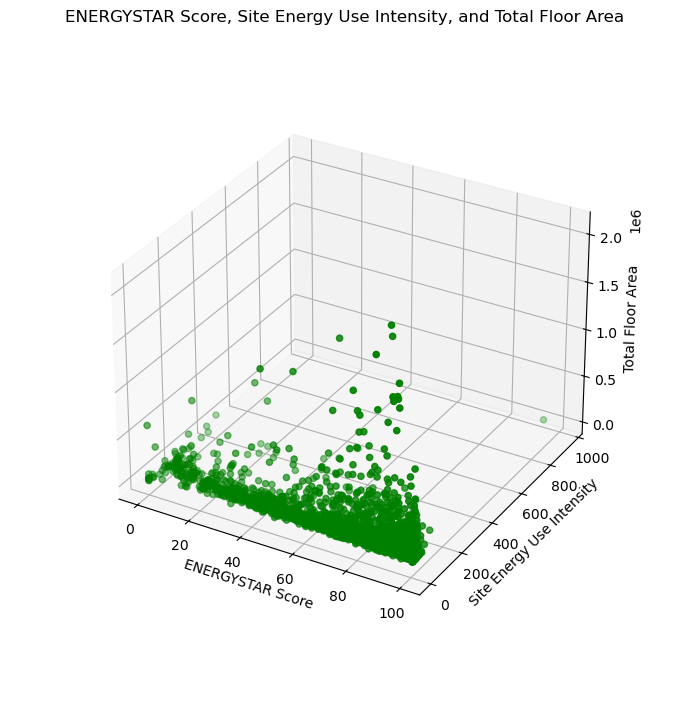

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('2022_Building_Energy_Benchmarking_20240906.csv')


#3D plot comparing ENERGYSTAR Score, Site Energy Use Intensity, and Total Floor Area.
x1=data['ENERGYSTARScore']
y1=data['SiteEUIWN(kBtu/sf)']
z1=data['PropertyGFATotal']

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x1, y1, z1, color = "green")
ax.set_xlabel('ENERGYSTAR Score')
ax.set_ylabel('Site Energy Use Intensity')
ax.set_zlabel('Total Floor Area')
plt.tight_layout()
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.title('ENERGYSTAR Score, Site Energy Use Intensity, and Total Floor Area') 
plt.show()

#### New Techniques

#### Heatmap of Seattle Buildings' Emissions

In [3]:
%pip install -q geopandas pandas matplotlib folium IPython
# Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap, MarkerCluster
from IPython.display import display, IFrame
import branca.colormap as cm

In [6]:
import os
os.chdir('../')

In [9]:
data = pd.read_csv('data/Seattle_Building_Data_Cleaned.csv')
data.columns

FileNotFoundError: [Errno 2] No such file or directory: 'data/Seattle_Building_Data_Cleaned.csv'

In [ ]:
#Heatmap of Total Emissions

#Create the map
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=12)

#Prepare heatmap data
heat_data = [[row['Latitude'], row['Longitude'], row['GHGEmissionsIntensity']] for index, row in data.iterrows()]

#Add heatmap layer
HeatMap(heat_data).add_to(m)

#Create a colormap
colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'orange', 'red'], vmin=min(data['GHGEmissionsIntensity']), vmax=max(data['GHGEmissionsIntensity']))
colormap.caption = 'GHG Emissions Intensity'

#Add the colormap to the map
m.add_child(colormap)

#Save the map to an HTML file
m.save('Code/geospatial/GHGEmissions_Heatmap.html')

#display the map in notebook
display(m)

Make this Notebook Trusted to load map: File -> Trust Notebook


In [ ]:
#Make Map
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=12)

#Add a marker for each building with name based on lat, long
mc = MarkerCluster()
for _, row in data.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    mc.add_child(folium.Marker([lat, lon], popup=row['BuildingName']))
m.add_child(mc)

m.save('Code/geospatial/Building_Markers_and_Names.html')

The heatmap GIS visualization provides an easy to interpret picture of whether or not there is a pattern between the location of a building within the city of seattle based on its geo-spatial coordinates and the density of emissions. In this case the heatmap provides more information about emissions that a simple marker map or chloropleth map would not be able to provide. 
The map of building marker clusters provides general information about the density of the buildings in our data set and shows that there is a spread of buildings providing data across the entire city of seattl These two visualizations are relevant as tools to ensure our final results incorporate data from a wide spread around the city of seattle instead of a select few neighborhoods. The Heatmap also allows for the identification of outliers by examining locations that stay a deep red as you zoom in. The Heatmap shows that there is a wide spread of emissions data for the entire city of seattle. As expected there is a strong concentration of Emissions coming from the industrial area associated with the Port of Seattle. There is also a high density of emissions coming from the downtown area of seattle as well. There are a few noticeable outliers, one being in the University of Washington's Health Science Building. This visualization confirms that a buildings geographic location within the City of Seattle may be a good predictor to include for a buildings emissions model. Logically it follows that a building in an industrial area would produce more emissions than than a large residential area, this supports that line of reasoning.e.

#### DBSCAN Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

df = pd.read_csv('Data/Seattle_Building_Data_Cleaned.csv')

##### Determining Optimal Parameters to Minimize Outliers


In [ ]:
# determine best eps and min_sample for lowest number of outliers with at least 3 clusters
# NOTE: this nested loop takes a considerable amount of time to execute (approx. 20 min)

data = df["GHGEmissionsIntensity"].values.reshape(-1, 1)

min_noise = 10**5
best_eps = 0
best_min_sample = 0

for eps in np.arange(0.01, 1.01, 0.01):
    print("on eps: ", eps)
    for min_sample in range(100, 1217, 1):
        db = DBSCAN(eps=eps, min_samples=min_sample).fit(data)
        labels = db.labels_
        
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        num_noise = list(labels).count(-1)

        if (num_clusters >= 3) and (num_noise < min_noise):
            min_noise = num_noise
            best_eps = eps
            best_min_sample = min_sample

print("The lowest number of outliers is ", min_noise)
print("The associated eps: ", best_eps, " and min_sample: ", best_min_sample)

##### DBSCAN with Selected Parameters

In [ ]:
data = df["GHGEmissionsIntensity"].values.reshape(-1, 1)

db = DBSCAN(eps=0.17, min_samples=414).fit(data)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

In [12]:
# function to map cluster labels in ascending order of GHG Intensity (was previously 1, 2, 0, -1, want 0, 1, 2, 3)
def relabel(i):
    if i == 1.0:
        return 0
    elif i == 2.0:
        return 1
    elif i == 0.0:
        return 2
    elif i == -1.0:
        return 3

# add new cluster labels to the df (called df2 now)
df2 = df.assign(GHGIntensityCluster=pd.Series(labels).apply(relabel))

df2.to_csv('Data/Seattle_Building_Clusters.csv', index=False)

NameError: name 'df' is not defined

In [ ]:
# plot the distribution of GHGEmissionIntensity in each cluster

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df2.plot(kind="scatter", alpha = 0.25, ax=axes[0], x = "GHGIntensityCluster", y = "GHGEmissionsIntensity")
axes[0].set_title("Clusters' Distribution of GHG Emission Intensity")

df2.loc[df2["GHGEmissionsIntensity"] <= 2, ].plot(kind="scatter", alpha = 0.25, ax=axes[1], x = "GHGIntensityCluster", y = "GHGEmissionsIntensity")
axes[1].set_title("Clusters' Distribution of GHG Emission Intensity (closer view)")

plt.tight_layout()

##### Accessing the New Clusters' Range

In [ ]:
for cluster in range(4):
    df2_cluster = df2.loc[df2["GHGIntensityCluster"] == cluster,]
    
    print("for cluster: ", cluster)
    print("size: ", len(df2_cluster["GHGEmissionsIntensity"]))
    print("min values is: ", min(df2_cluster["GHGEmissionsIntensity"]))
    print("max values is: ", max(df2_cluster["GHGEmissionsIntensity"]))

For the 4 cluster groups made, we have:

| Cluster Label | Size |   Min |   Max | Cluster Name   |
|---------------|------|-------|-------|-----------------|
| 0             | 1824 | 0     | 0.53  | low             |
| 1             | 358  | 0.54  | 0.78  | med             |
| 2             | 731  | 0.79  | 1.46  | high            |
| 3             | 740  | 1.47  | 42.35 | extreme high    |

Then, with the table and the scatter plots provided, we may consider the intervals listed in the table (min - max) as the clusters. Note that cluster 3 is all the outliers of the dataset that DBSCAN did not cluster. However, since all the outliers lay above the rest of the points we may choose to make the outliers their own distinct cluster that we can simply call extreme high.

DBSCAN is useful to create clusters with differing sizes and when there are many outliers (which GHGEmissionIntensity has). Unlike k-means, DBSCAN does not require a number of clusters, instead automatically creating an appropriate number of clusters (in this case three). This clustering essentially creates a numerical response feature into a categorical response. This allows us an alternative classification model if our regression model performs poorly. As seen in the table above, DBSCAN found 3 official clusters when our epsilon value (maximum distance between points to be considered "close") was set to 0.17 and our minimum sample value (min number of points "close" to a particular point to be a core point) was 414. The last "cluster" is DBSCAN's outliers who did not make it into a cluster. However, as the data is 1D, all true clusters partition the data sequentially, and all outliers are higher than the clusters, we can count the outliers as its own cluster and call it extreme high. The clusters in conjunction with a decision tree can give us a different model to classify GHG Emission Intensity rather than predicting a value which may yield unsatisfactory results. Another thing to note is that we can use DBSCAN on other variables we may later want to classify to assist our model.

#### Decision Tree

In [ ]:
#Setup Block
%pip install -q pandas sklearn matplotlib

#Makes paths work if you just clone or pull the repo
import os
os.chdir('../')

In [ ]:
#References: https://www.datacamp.com/tutorial/decision-tree-classification-python, https://scikit-learn.org/dev/modules/generated/sklearn.tree.plot_tree.html
#Importing necessary libraries.
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

#Impporting the cleaned data that includes GHG Intensity Clusters that Libby created. Thank you Libby!
clusterData = pd.read_csv('/Data/Seattle_Building_Clusters.csv')

#Assigning the dependent and independent variables.
#Not every variable is included in the independent variables, since some of them were strings and I didn't want to go to the trouble of changing types until we knew we liked this method.
X = clusterData[['YearBuilt','NumberofFloors','NumberofBuildings','PropertyGFATotal','ENERGYSTARScore','SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)']]
y = clusterData[['GHGIntensityCluster']]

#Splitting the data into training and testing sets. I chose a 80% training and 20% testing split. 
#random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
clf = DecisionTreeClassifier(random_state=12)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

#Printing accuracy findings of the model. 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Graphing the decision tree.
plt.figure(figsize=(40,40))
_ = tree.plot_tree(clf, feature_names = X.columns, fontsize=10)

A decision tree will decide on which variables to attribute higher weight to as it is trained on the training data, as opposed to other models where you need to specify which features are used. Since we aren’t yet sure which features to use for modeling, this will give us an initial idea. In addition to giving us an idea of what the key variables are, the decision tree will also tell us which variables have little impact on emissions, meaning they can be dropped. After training the decision tree, we found the model to have an accuracy of about 74% when predicting the clusters of the test dataset, meaning that it is decently accurate, and that the features near the root node should be good predictors of emissions. After plotting the decision tree, we found the most important features for this model to be site energy use intensity, source energy use intensity, and the year the building was built in. Now, we can utilize the results from this analysis when we create our model, starting with the three previously mentioned variables as our primary features.

#### Conclusion

As a result of our analysis, we identified that some of the most impactful variables when it comes to determining co2 emissions are site energy use intensity, source energy use intensity, and the year the building was built. We also gained a powerful tool, the heatmap, which can both be used to identify potential clusterings of buildings, like port buildings, something that could be a feature used in the model, and for outlier detection, which will inform us of how we should handle the outliers in this dataset when it comes to modeling. This information is invaluable moving forwards as we complete the remainder of our project, as the next and arguably most important step is developing a model, which is entirely reliant on which features are used. With this knowledge, we now have an excellent starting point for our model, as we know which features to attribute the most weight to, and which we can consider dropping or giving little significance to, as well as whether to include all outliers, or if we should drop some beyond a certain threshold. Additionally, the clustering of the observations by greenhouse gas intensity that we performed is very helpful, as it created a categorical value for a building's emissions. While we are currently planning to use a regression model, if we find that to be a poor fit as we further analyze the data, this clustering and classification of the observations gives us an alternative in the form of a classification model. This analysis has provided us with the next steps in this process, as our new primary goal is to develop a regression model, placing high importance on the key attributes that we found. In this sense, the analysis performed here has provided us with a springboard to create our model. 
